<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_5_2_Exploring_Data_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis del Default

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

In [ ]:
df_default=pd.read_csv("Default_Real.csv")
df_default.head(10) # T1-T2 = 12 meses

,id,Mora30_T1,Mora60_T1,Mora90_T1,Mora120_T1,Limpio_T1,Limpio_T2,Mora30_T2,Mora60_T2,Mora90_T2,Mora120_T2,MesesDef
0,1,1,0,0,0,0,1,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,1,0
2,3,1,0,0,0,0,1,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,1,0
4,5,0,0,0,0,1,0,0,0,0,1,0
5,6,1,0,0,0,0,1,0,0,0,0,0
6,7,0,0,0,0,1,0,0,0,0,1,0
7,8,0,0,0,0,1,0,0,0,0,1,0
8,9,0,0,0,0,1,0,0,0,0,1,0
9,10,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_default.shape

(100000, 12)

In [ ]:
df_default["Mora30_T1"].sum(), df_default["Mora30_T1"][df_default["Mora30_T1"]==1].sum() # Sumar la columna o sumar los 1 es lo mismo

(43743, 43743)

In [ ]:
df_default["Mora60_T1"].sum(), df_default["Mora60_T1"][df_default["Mora60_T1"]==1].sum() # Sumar la columna o sumar los 1 es lo mismo

(4083, 4083)

In [ ]:
df_default["Mora90_T1"].sum(), df_default["Mora90_T1"][df_default["Mora90_T1"]==1].sum() # Sumar la columna o sumar los 1 es lo mismo

(4067, 4067)

In [ ]:
df_default["Mora120_T1"].sum(), df_default["Mora120_T1"][df_default["Mora120_T1"]==1].sum() # Sumar la columna o sumar los 1 es lo mismo

(4006, 4006)

In [ ]:
df_default["Mora30_T1"].mean(), df_default["Mora30_T1"][df_default["Mora30_T1"]==1].sum()/df_default["Mora30_T1"].count() # El Ratio de 1 es el promedio de la columna.

(0.43743, 0.43743)

In [ ]:
df_default[df_default["Mora30_T1"]==1][["Limpio_T2","Mora30_T2","Mora60_T2","Mora90_T2","Mora120_T2"]].mean()

Limpio_T2     0.803557
Mora30_T2     0.096175
Mora60_T2     0.050728
Mora90_T2     0.049539
Mora120_T2    0.000000
dtype: float64

## La tasa de empeoramiento de los clientes de 1-30d es de 10%

In [ ]:
df_default[df_default["Mora60_T1"]==1][["Limpio_T2","Mora30_T2","Mora60_T2","Mora90_T2","Mora120_T2"]].mean()

Limpio_T2     0.096008
Mora30_T2     0.103845
Mora60_T2     0.102376
Mora90_T2     0.402645
Mora120_T2    0.295126
dtype: float64

## La tasa de empeoramiento de los clientes de 30-60d es de 70%

In [ ]:
df_default[df_default["Mora90_T1"]==1][["Limpio_T2","Mora30_T2","Mora60_T2","Mora90_T2","Mora120_T2"]].mean()

Limpio_T2     0.052127
Mora30_T2     0.049914
Mora60_T2     0.104500
Mora90_T2     0.256946
Mora120_T2    0.536513
dtype: float64

In [ ]:
df_default[df_default["Mora120_T1"]==1][["Limpio_T2","Mora30_T2","Mora60_T2","Mora90_T2","Mora120_T2"]].mean()

Limpio_T2     0.000000
Mora30_T2     0.048927
Mora60_T2     0.101098
Mora90_T2     0.153270
Mora120_T2    0.696705
dtype: float64

**Nos quedamos con Mora60 porque nos da un punto de no retorno**

### Plazo del default
Cuan grande tiene que ser mi ventana para capturar la mayor cantidad de defaults?

In [ ]:
df_default.pivot_table(index="MesesDef",values="id",aggfunc="count")

,id
MesesDef,
0,87851
1,81
2,291
3,637
4,1115
5,1557
6,1879
7,1817
8,1525


In [ ]:
df_aux=df_default.pivot_table(index="MesesDef",values="id",aggfunc="count").drop([0], axis = 0)
df_aux=df_aux.reset_index()
df_aux.rename(columns={"id":"N"}, inplace=True)
df_aux

,MesesDef,N
0,1,81
1,2,291
2,3,637
3,4,1115
4,5,1557
5,6,1879
6,7,1817
7,8,1525
8,9,1232
9,10,843


In [ ]:
df_aux["Porc"]=df_aux["N"]/(df_aux["N"].sum())
df_aux["PorcAcm"]=df_aux["Porc"].cumsum()
df_aux

,MesesDef,N,Porc,PorcAcm
0,1,81,0.006667,0.006667
1,2,291,0.023953,0.030620
2,3,637,0.052432,0.083052
3,4,1115,0.091777,0.174829
4,5,1557,0.128159,0.302988
5,6,1879,0.154663,0.457651
6,7,1817,0.149560,0.607210
7,8,1525,0.125525,0.732735
8,9,1232,0.101408,0.834143
9,10,843,0.069388,0.903531


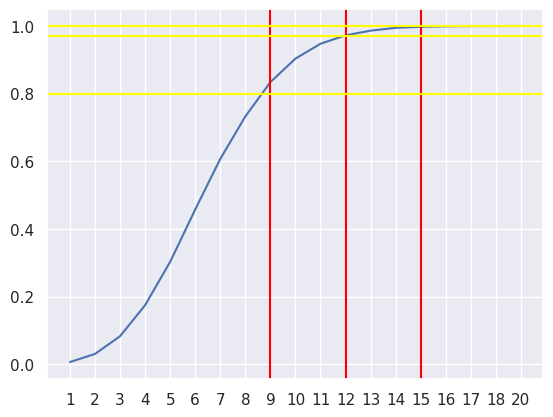

In [ ]:
plt.plot(df_aux["MesesDef"].astype("str"),df_aux["PorcAcm"])
plt.axvline(x=11, color="red")
plt.axvline(x=14, color="red")
plt.axvline(x=8, color="red")
plt.axhline(y=1, color="yellow")
plt.axhline(y=0.8, color="yellow")
plt.axhline(y=0.97, color="yellow")

**Ya en el mes 12 estoy capturando la mayoria de defaults**

Definición de default: MORA 60 visto a 12 meses

In [ ]:
conditions = [
    (df_default['MesesDef'] == 0),
    (df_default['MesesDef'] > 0) & (df_default['MesesDef'] <= 12),
    (df_default['MesesDef'] > 12)
    ]
# Valores
values = [0, 1, 0]

# Calculamos el default observado (60 a 12 meses)
df_default['Def_60D_12M'] = np.select(conditions, values)
df_default.head()

,id,Mora30_T1,Mora60_T1,Mora90_T1,Mora120_T1,Limpio_T1,Limpio_T2,Mora30_T2,Mora60_T2,Mora90_T2,Mora120_T2,MesesDef,Def_60D_12M
0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,1,0,0
2,3,1,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,1,0,0
4,5,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
df_default['Def_60D_12M'].value_counts()

0    88187
1    11813
Name: Def_60D_12M, dtype: int64